### Death toll data from Wikipedia

This is an attempt to summarise war death toll data from Wikipedia: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll

I downloaded the data in April 2024. A similar topic has been recently explored in https://ourworldindata.org/war-and-peace, but their data starts at 1800. I'm not sure how Wikipedia data compares to other sources in terms of accuracy. My goal was to find the most intense wars when it comes to death toll and the longest wars.

The general approach is to extract and clean the dates and death ranges.

In [55]:
import pandas as pd
w = pd.read_csv(r"C:\Users\karol\projects\wikiWar\war_data_04_2024.csv")
w.head(30)

,War,Death\nrange,Date,Combatants,Location,Notes
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars
5,First Punic War,"400,000+",264 BC–241 BC,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa,Part of the Punic Wars
6,Gallic Wars,"1,000,000+",58 BC–50 BC,Roman Republic vs. Gallic tribes,France,NaN
7,Greco–Persian Wars,"300,000+",499 BC–449 BC,Greek City-States vs. Persian Empire,Greece,NaN
8,Hunnic Reclaims,"165,000+\n[citation needed]",395–453,Roman Empire vs. Hunnic Empire,Europe,Number given is the sum of all deaths in battl...
9,Iceni Revolt,"150,000+[4]",60–61,Roman Empire vs. Celtic tribes,England,Year is uncertain – Part of the Roman Conquest...


In [2]:
w[w['War'] == 'World War I']


,War,Death\nrange,Date,Combatants,Location,Notes
111,World War I,"17,000,000-40,000,000",1914–1918,Allied Powers vs. Central Powers,Worldwide,[27] – Also known as the Great War


In [44]:

#use start date as reference point, not the middle date

import re

def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group())
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondNumber(stringWithNumbers):
    try:
        # Match the input string with one of the specified formats
        #match = re.match(r'(\d+)-(\d+)|(\d+)-present|(\d+)|*-\s*(\d+)', stringWithNumbers)
        #match = re.search(r'–\s*(\d+)', t)
        match = re.search(r'–\s*(\d+).*|(\d+)–present', stringWithNumbers)

        
        if match:
            # Check which pattern matched
            if match.group(1):  # Format: "111-111212"
                return int(match.group(1))
            elif match.group(2):  # Format: "3434-present"
                return 2024
         
           
          
        
    except:
        pass
    
    # If no match or error occurred, return the original input as an integer
    return int(stringWithNumbers)

In [56]:
#t ='c. 475 BC – 221 BC'
#t = '12121'
#t ='1918–present'
t = '264 BC–241 BC'
#match = re.search(r'–\s*(\d+)', t)
extractSecondNumber(t)
#remember to use search instead of match

241

In [57]:
w['startDate'] = w['Date'].map(extractFirstNumber)
w['endDate'] = w['Date'].map(extractSecondNumber)



In [58]:
w

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...,132,136
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un...",475,221
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars,113,101
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...,549,530
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars,66,73
...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,"377,000+",2014–present,Yemen's Supreme Political Council vs. Hadi Gov...,Yemen,UNDP estimate for the end of 2021. 60% attribu...,2014,2024
197,Tigray War,"162,000–378,000+ (Total civilian casualties in...",2020–2022,UFEFCF vs. Ethiopian and Eritrean Government,"Ethiopia (Tigray, Afar and Amhara Regions)",Part of the Ethiopian civil conflict.,2020,2022
198,Myanmar Civil War,"48,519",2021–present,National Unity Government vs. State Administra...,Myanmar,Part of the Internal conflict in Myanmar.,2021,2024
199,Russian invasion of Ukraine,"300,000+",2022–present,Russia vs. Ukraine,Ukraine,Estimates of deaths vary widely.[145][146] The...,2022,2024


In [60]:
#check whether all dates got extracted

# This approach directly filters rows where the conversion to numeric results in NaN, 
# indicating that those rows contain string values in the 'startDate' column.

rows_with_strings = w[pd.to_numeric(w['startDate'], errors='coerce').isna()]
rows_with_strings

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [61]:
r = w[pd.to_numeric(w['endDate'], errors='coerce').isna()]
r

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [62]:
#create a BC column
w['BC'] = w['Date'].str.contains('BC')

In [63]:
w = w.rename(columns = {'Death\nrange':'casualties'})


Extract higher death toll range and lower death toll range and put them in separate columns

In [64]:
#extract higher range or any number if there is just one number
import re
def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group().replace(',', ''))
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondOrFirstNumber(stringWithNumbers):
    
    try:
        # Remove commas, then find all groups of digits
        stringWithNumbers =stringWithNumbers.replace(',', '')
        matches = re.findall(r'\d+',stringWithNumbers)
        if matches:
            if len(matches) == 1:
                return int(matches[0])
            elif len(matches) == 2 and '[' in stringWithNumbers and ']' in stringWithNumbers:
                # Check if the second value is in brackets
                return int(matches[0])
            else:
                return int(matches[1])
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers
    

In [65]:
w['higherRange'] = w['casualties'].map(extractSecondOrFirstNumber)
w['lowerRange'] = w['casualties'].map(extractFirstNumber)

In [66]:
df = w[['War', 'BC', 'lowerRange', 'higherRange', 'startDate', 'endDate']]

In [67]:
df[df['BC']==True]

,War,BC,lowerRange,higherRange,startDate,endDate
1,Chinese Warring States,True,1500000,1500000,475,221
2,Cimbrian War,True,410000,650000,113,101
3,Conquests of Cyrus the Great,True,100000,100000,549,530
5,First Punic War,True,400000,400000,264,241
6,Gallic Wars,True,1000000,1000000,58,50
7,Greco–Persian Wars,True,300000,300000,499,449
12,Punic Wars,True,1620000,1920000,264,146
13,Qin's Wars of Unification,True,700000,700000,230,221
14,Roman civil wars from Social War (91–87 BC) to...,True,3000000,3000000,91,30
15,Samnite Wars,True,33500,33500,343,290


In [68]:
#check for null values
# Check for null values in the first column
df['lowerRange'].isnull().any()
df['higherRange'].isnull().any()
 

False

In [69]:
import numpy as np
#df['geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])
df.loc[:, 'geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])

C:\Users\karol\AppData\Local\Temp\ipykernel_16844\2381831720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])


In [76]:
#get the duration
df['duration'] = np.where(df['BC'], df['startDate'] - df['endDate']+1, df['endDate'] - df['startDate']+1)
#add 1 year so wars that happend withing 1 year have duration of 1

C:\Users\karol\AppData\Local\Temp\ipykernel_16844\4008147176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = np.where(df['BC'], df['startDate'] - df['endDate']+1, df['endDate'] - df['startDate']+1)


In [77]:
df


,War,BC,lowerRange,higherRange,startDate,endDate,geom_mean,duration,deathRate
0,Bar Kokhba Revolt,False,580000,580000,132,136,5.800000e+05,5,145000.000000
1,Chinese Warring States,True,1500000,1500000,475,221,1.500000e+06,255,5905.511811
2,Cimbrian War,True,410000,650000,113,101,5.162364e+05,13,43019.698330
3,Conquests of Cyrus the Great,True,100000,100000,549,530,1.000000e+05,20,5263.157895
4,First Jewish–Roman War,False,250000,1100000,66,73,5.244044e+05,8,74914.917726
...,...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,False,377000,377000,2014,2024,3.770000e+05,11,37700.000000
197,Tigray War,False,162000,378000,2020,2022,2.474591e+05,3,123729.543764
198,Myanmar Civil War,False,48519,48519,2021,2024,4.851900e+04,4,16173.000000
199,Russian invasion of Ukraine,False,300000,300000,2022,2024,3.000000e+05,3,150000.000000


In [78]:
#calculate the death toll to war length ratio
df['deathRate'] = df['geom_mean'] / df['duration']




C:\Users\karol\AppData\Local\Temp\ipykernel_16844\3758635135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deathRate'] = df['geom_mean'] / df['duration']


In [83]:
sorted_df = df.sort_values(by='deathRate', ascending=False)
sorted_df

,War,BC,lowerRange,higherRange,startDate,endDate,geom_mean,duration,deathRate
123,World War II,False,80000000,80000000,1939,1945,8.000000e+07,7,1.142857e+07
111,World War I,False,17000000,40000000,1914,1918,2.607681e+07,5,5.215362e+06
84,Taiping Rebellion,False,20000000,70000000,1850,1864,3.741657e+07,15,2.494438e+06
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,2.236068e+07,9,2.484520e+06
25,An Lushan Rebellion,False,13000000,36000000,755,763,2.163331e+07,9,2.403701e+06
...,...,...,...,...,...,...,...,...,...
15,Samnite Wars,True,33500,33500,343,290,3.350000e+04,54,6.203704e+02
44,Arauco War,False,125000,142000,1550,1790,1.332291e+05,241,5.528179e+02
138,Ethnic conflict in Nagaland,False,34000,34000,1954,2024,3.400000e+04,71,4.788732e+02
145,Insurgency in Northeast India,False,25000,25000,1964,2024,2.500000e+04,61,4.098361e+02


In [121]:
#top 10 intense wars ingraph
intense_wars = sorted_df.head(10)[['War', 'duration', 'deathRate']]
intense_wars = intense_wars.sort_values(by='deathRate', ascending=True)

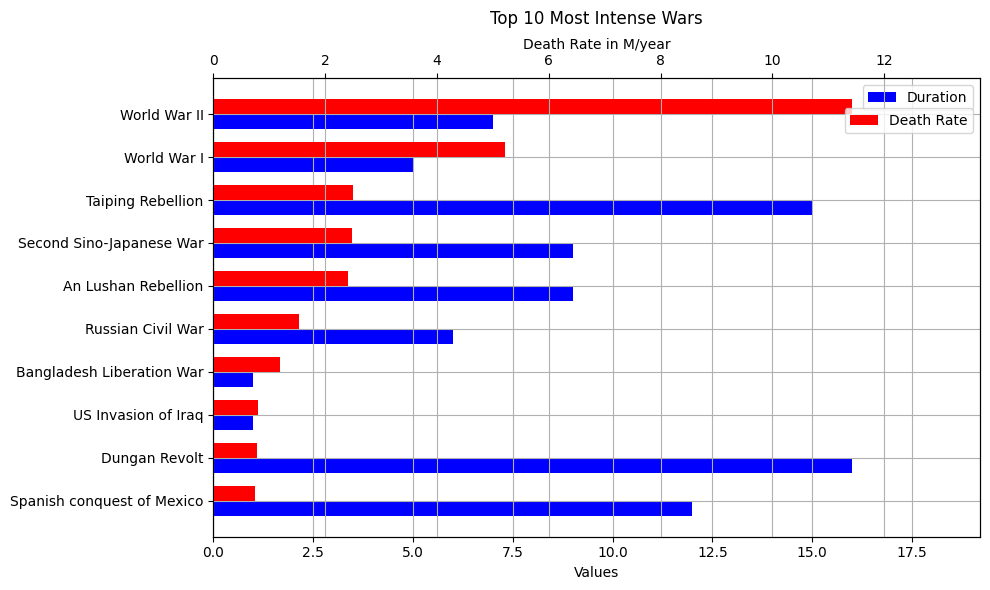

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
wars = intense_wars['War']
death_rates = intense_wars['deathRate']/1000000
durations = intense_wars['duration']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set title and labels
ax1.set_title('Top 10 Most Intense Wars', pad=10)
ax1.set_xlabel('Duration')
#ax1.set_ylabel('Wars')

# Define the width of each bar
bar_width = 0.35

# Create index for the y-axis
index = np.arange(len(wars))

# Plot duration bars
ax1.barh(index - bar_width / 2, durations, bar_width, color='blue', label='Duration')

# Create another axis for death rate with a different scale
ax2 = ax1.twiny()

# Set labels for the second axis
ax2.set_xlabel('Death Rate in M/year')

# Plot death rate bars
ax2.barh(index + bar_width / 2, death_rates, bar_width, color='red', label='Death Rate')

# Set y-axis ticks and labels
ax1.set_yticks(index)
ax1.set_yticklabels(wars)

# Adjust the limits of both axes to make them visible
max_duration = max(durations)
max_death_rate = max(death_rates)
ax1.set_xlim(0, max_duration * 1.2)
ax2.set_xlim(0, max_death_rate * 1.2)

# Show legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))  # Adjust legend position


# Add grid
ax1.grid(True)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#reverse the sorting

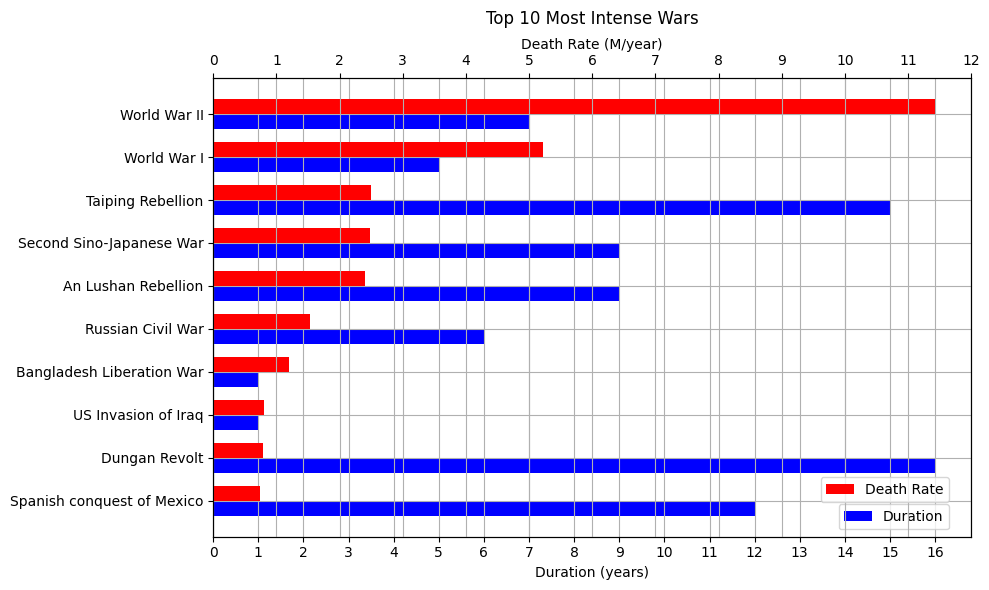

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
wars = intense_wars['War']
death_rates = intense_wars['deathRate'] / 1000000
durations = intense_wars['duration']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set title and labels
ax1.set_title('Top 10 Most Intense Wars', pad=10)
ax1.set_xlabel('Duration (years)')
#ax1.set_ylabel('Wars')

# Define the width of each bar
bar_width = 0.35

# Create index for the y-axis
index = np.arange(len(wars))

# Plot duration bars
ax1.barh(index - bar_width / 2, durations, bar_width, color='blue', label='Duration')

# Create another axis for death rate with a different scale
ax2 = ax1.twiny()

# Set labels for the second axis
ax2.set_xlabel('Death Rate (M/year)')

# Plot death rate bars
ax2.barh(index + bar_width / 2, death_rates, bar_width, color='red', label='Death Rate')

# Set y-axis ticks and labels
ax1.set_yticks(index)
ax1.set_yticklabels(wars)

# Set x-axis ticks every 1 point
ax1.set_xticks(np.arange(0, max(durations) + 1, 1))
ax2.set_xticks(np.arange(0, max(death_rates) + 1, 1))


# Adjust the limits of both axes to make them visible
# max_duration = max(durations)
# max_death_rate = max(death_rates)
# ax1.set_xlim(0, max_duration * 1.2)
# ax2.set_xlim(0, max_death_rate * 1.2)

# Show legend
ax1.legend(loc='lower right', bbox_to_anchor=(0.98, 0.001))
ax2.legend(loc='lower right', bbox_to_anchor=(0.98, 0.06))  # Adjust legend position

# Add grid
ax1.grid(True)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Reverse the sorting

In [82]:
sorted_df = df.sort_values(by='duration', ascending=False)
sorted_df.head(15)

,War,BC,lowerRange,higherRange,startDate,endDate,geom_mean,duration,deathRate
23,Reconquista,False,7000000,7000000,711,1492,7.000000e+06,782,8951.406650
22,Arab–Byzantine Wars,False,2000000,2000000,629,1050,2.000000e+06,422,4739.336493
1,Chinese Warring States,True,1500000,1500000,475,221,1.500000e+06,255,5882.352941
44,Arauco War,False,125000,142000,1550,1790,1.332291e+05,241,552.817950
28,Crusades,False,1000000,3000000,1095,1291,1.732051e+06,197,8792.136079
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,3.464102e+07,163,212521.571481
20,Wars of the Sixteen Kingdoms,False,150000,150000,304,439,1.500000e+05,136,1102.941176
12,Punic Wars,True,1620000,1920000,264,146,1.763633e+06,119,14820.442141
32,Hundred Years' War,False,2300000,3500000,1337,1453,2.837252e+06,117,24250.018734
113,Kurdish separatism in Iran,False,15000,58000,1918,2024,2.949576e+04,107,275.661331


In [ ]:
#https://www.reddit.com/r/learnpython/comments/p3cmgh/easy_alternative_to_matplotlib/